# Tabular Q-learning for the toy problem frozen lake #

## Frozen lake ##

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.
The surface is described using a grid like the following:

SFFF  
FHFH  
FFFH  
HFFG  

S: starting point, safe  
F: frozen surface, safe  
H: hole, fall to your doom  
G: goal, where the frisbee is located

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

https://gym.openai.com/envs/FrozenLake-v0/

https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py

## Imports ##

In [1]:
import numpy as np
import gym
import random

%matplotlib inline
import matplotlib.pyplot as plt

## Create frozen lake environment ##

In [2]:
env = gym.make("FrozenLake-v0")

## Create Q table and initialize it ##

In [3]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [4]:
print("Number of states:", state_size)
print("Number of actions:", action_size)

Number of states: 16
Number of actions: 4


In [5]:
q_table = np.zeros((state_size, action_size))

In [6]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
total_episodes = 25000        # Total episodes
learning_rate = 0.1           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.995                 # Discount 

# Parameters for epsilon greedy strategy
epsilon = 1.0                 # Exploration probability
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.0             # Minimum exploration probability 
decay_rate = 0.0005           # Exponential decay rate for exploration prob

In [8]:
episode_reward_list = []

for episode in range(total_episodes):
    # reset the environment
    state = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        # epsilon greedy strategy 
        if random.uniform(0.0, 1.0) <= epsilon:
            # random choice
            action = env.action_space.sample()
        else:
            # select best action in state s
            # a = argmax_a' q(s,a')
            action = np.argmax(q_table[state,:])

        # take action a, get reward r, and observe next_state s'
        new_state, reward, done, _ = env.step(action)
        
        # update q table according to transition (s, a, r, s')
        # q(s,a) := q(s,a) + alpha [r + gamma * max q(s',a') - q(s,a)]
        q_table[state, action] += learning_rate * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        
        total_reward += reward
                
        # If done, then finish episode, else update state
        if done: 
            break
        else:
            state = new_state

    if episode % 1000 == 0: 
        print("Episode {0:5}, total reward {1:.1f}, epsilon {2:.6f}".format(episode, total_reward, epsilon))
            
    # decrease epsilon 
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
    episode_reward_list.append((episode, total_reward))

Episode     0, total reward 0.0, epsilon 1.000000
Episode  1000, total reward 0.0, epsilon 0.606834
Episode  2000, total reward 0.0, epsilon 0.368063
Episode  3000, total reward 1.0, epsilon 0.223242
Episode  4000, total reward 0.0, epsilon 0.135403
Episode  5000, total reward 0.0, epsilon 0.082126
Episode  6000, total reward 1.0, epsilon 0.049812
Episode  7000, total reward 1.0, epsilon 0.030212
Episode  8000, total reward 1.0, epsilon 0.018325
Episode  9000, total reward 1.0, epsilon 0.011115
Episode 10000, total reward 1.0, epsilon 0.006741
Episode 11000, total reward 1.0, epsilon 0.004089
Episode 12000, total reward 1.0, epsilon 0.002480
Episode 13000, total reward 1.0, epsilon 0.001504
Episode 14000, total reward 1.0, epsilon 0.000912
Episode 15000, total reward 1.0, epsilon 0.000553
Episode 16000, total reward 1.0, epsilon 0.000336
Episode 17000, total reward 1.0, epsilon 0.000204
Episode 18000, total reward 1.0, epsilon 0.000123
Episode 19000, total reward 1.0, epsilon 0.000075


## Visualize learning progress ##

In [9]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

Text(0,0.5,'Total Reward')

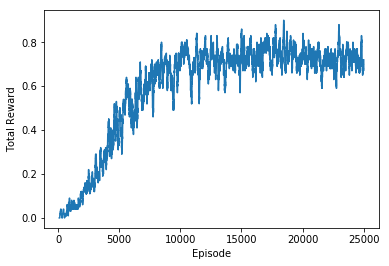

In [10]:
eps, rews = np.array(episode_reward_list).T
smoothed_rews = running_mean(rews, 100)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.xlabel('Episode')
plt.ylabel('Total Reward')

## Observe trained agent ##

In [11]:
env.reset()

for episode in range(10):
    state = env.reset()

    for step in range(max_steps):
        
        # take the best action
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, _ = env.step(action)
        
        if done:
            # show terminal state
            env.render()
            
            # We print the number of step it took.
            if reward == 1:
                print("Agent got frisbee in step {0:3}.".format(step))
            else:
                print("Agent fell into frozen lake in step {0:3}.".format(step))
            print()
            break
        state = new_state
        
env.close()

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  11.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  61.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  40.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  97.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  71.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  59.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  15.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  27.

  (Down)
SFFF
FHFH
FFFH
HFFG
Agent got frisbee in step  13.

